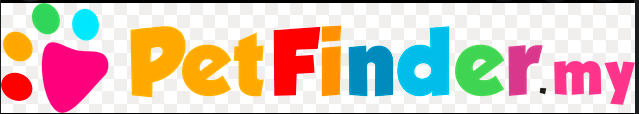

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
train_data = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
test_data = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/test.csv')
subm_file = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/sample_submission.csv')

In [ ]:
train_data.head()

In [ ]:
# Target variable
plt.hist(train_data["Pawpularity"], bins=200)
plt.show()

In [ ]:
y_train = train_data['Pawpularity']
X_train = train_data[train_data.columns[1:-1]]
X_test = test_data[test_data.columns[1:]]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=10)

In [ ]:
#xgboost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)


In [ ]:
## decision tree
dec_model = DecisionTreeRegressor(random_state=10, max_depth=5)
dec_model.fit(X_train, y_train)
y_test_dec = dec_model.predict(X_test)


In [ ]:
y_test = y_test_dec*0.5+y_test_pred*0.5
subm_file['Pawpularity'] = y_test

In [ ]:
# thanks 